In [1]:
# Importing Required Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn import model_selection
from pprint import pprint

In [2]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='7zxscIPQd77qLdAiX2q7BN7n2rzqJ9ITGiPNCHRTG9Qw',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')

bucket = 'wine-donotdelete-pr-e2oxfuump3tvqz'
object_key = 'winequalityN.csv'

body = cos_client.get_object(Bucket=bucket,Key=object_key)['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

data_full = pd.read_csv(body)
data_full.head()


,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [3]:
# Loading dataset
#data_full = pd.read_csv("winequalityN.csv")

In [4]:
data_full.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [5]:
data_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [6]:
data_full.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [7]:
data_full.columns

Index(['type', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'],
      dtype='object')

In [8]:
# Preprocessing
#First, let us see how many missing entries are in the dataset:

total_entries = (data_full.shape[0] * data_full.shape[1])
missing_entries_max = data_full.isnull().sum().sum()
missing_entries_max_percentage = (missing_entries_max / total_entries) * 100

print(f"Total entries in the dataset: %i" % total_entries)
print(f"Maximum missing values in the dataset: {missing_entries_max}")
print(f"Percentage of maximum missing values in the dataset: {missing_entries_max_percentage:.2f}%")

Total entries in the dataset: 84461
Maximum missing values in the dataset: 38
Percentage of maximum missing values in the dataset: 0.04%


Since the percentage of missing entries is negligable, we can drop each observation that contains a null without affecting the accuracy of the prediction.

In [9]:
data_full = data_full.dropna(axis=0)

In [10]:
#Now, we will ordinally encode the 'type' feature:
data_full = data_full.replace('red', 0)
data_full = data_full.replace('white', 1)

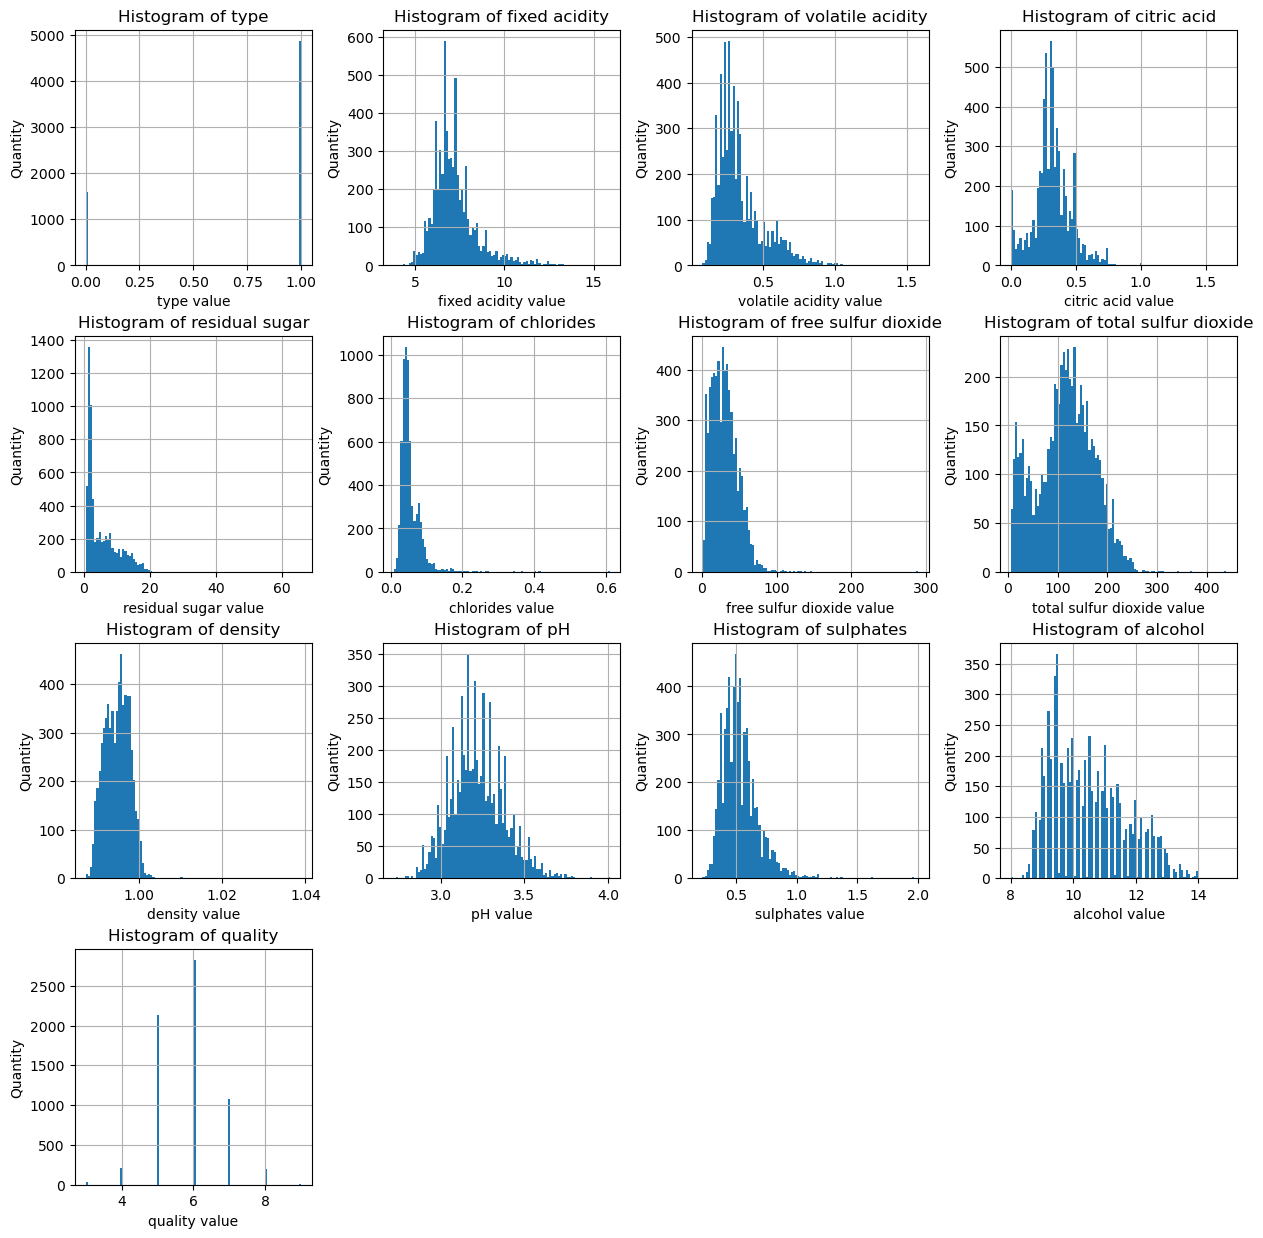

In [11]:
#Now, we will plot a histogram for each of the parameters:
axarr = data_full.hist(bins = 100, figsize = (15, 15))

for ax in axarr.flatten():
    ax.set_xlabel(f"{ax.get_title()} value")
    ax.set_ylabel("Quantity")
    title = ax.get_title()
    ax.set_title(f"Histogram of {title}")

plt.show()

In particular, we will show the histogram of quality parameter, as this is the most important parameter in our project(this is our target), and see what is the most common vote of quality in the dataset.

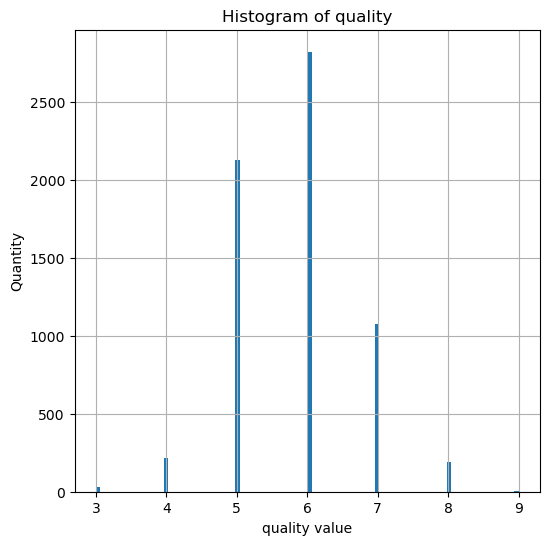

In [12]:
axarr = data_full.hist(column=['quality'], bins=100, figsize=(6, 6))

ax = axarr.flatten()[0]
ax.set_xlabel(f"{ax.get_title()} value")
ax.set_ylabel("Quantity")
title = ax.get_title()
ax.set_title(f"Histogram of {title}")

plt.show()

As we can see, the most common vote is '6', when the lowest vote is '3', and the highest vote is '9'. In general, we may see that most of the parameters (except the "type" parameter, which is binary parameter) are normally distributed.


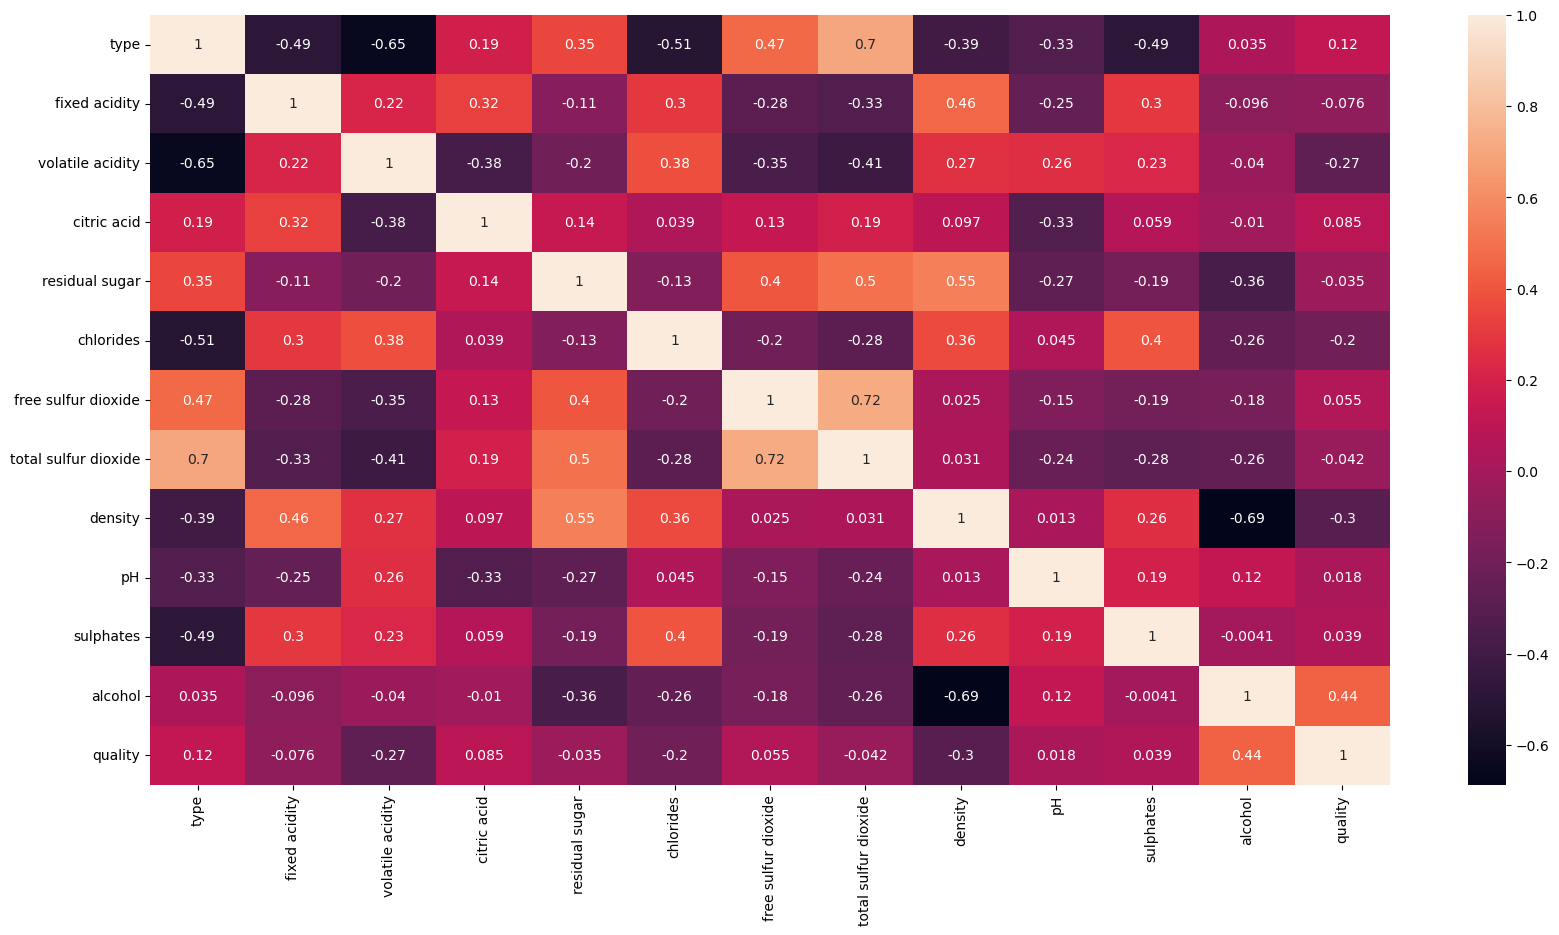

In [13]:
#Now, we will show the correlation between the parameters with a heatmap:
plt.figure(figsize = (20, 10))
sns.heatmap(data_full.corr(), annot = True)
plt.show()

We will chose to set that if there is correlation above 0.7 between two different parameters, the correlation is high enough, so we can remove one of the features. Hence, we decided to remove the feature 'total sulfur dioxide'.

In [14]:
data_full = data_full.drop('total sulfur dioxide',axis=1)
data_full = pd.get_dummies(data_full, drop_first=True)

Now, notice that because our dataset in unbalanced (i.e. there are parameters which have high ranges with respect to others), we will normalize each feature to be in the range [0, 1].

In [15]:
#scaler = MinMaxScaler()
#data_fit = scaler.fit(data_full)
#data_fit = data_fit.transform(data_full)

# Reconstructing the dataset
#data_full = pd.DataFrame(data_fit, columns=['type', 'fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','density','pH','sulphates','alcohol','quality'])
#data_full.head()

In [16]:
data_full.columns=['type', 'fixed_acidity', 'volatile_acidity', 'citric_acid',
       'residual_sugar', 'chlorides', 'free_sulfur_dioxide', 'density', 'pH',
       'sulphates', 'alcohol', 'quality']

In [17]:
data_full.head(2)

,type,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,1,7.0,0.27,0.36,20.7,0.045,45.0,1.001,3.0,0.45,8.8,6
1,1,6.3,0.30,0.34,1.6,0.049,14.0,0.994,3.3,0.49,9.5,6


In [18]:
# Spliting the dataset
X = data_full[['type', 'fixed_acidity','volatile_acidity','citric_acid','residual_sugar','chlorides','free_sulfur_dioxide','density','pH','sulphates','alcohol']]
y = data_full.quality

# 80% train set, 20% test set
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 42)

## Developing an optimized model
* Developing & Training the models using 6 experiments

First, let us introduce the following function, which computes the RMSE between the test values and the prediction values:

In [19]:
def get_rmse(y_test, predictions):
    return mean_squared_error(y_test, predictions) ** 0.5

In the following 6 experiments, we check the relationship between each parameter of the RandomForestRegressor model and the RMSE, by training 10-20 models in each experiment, that have the same parameters, except the parameter that we want to check. Then, each model makes predictions which are then evaluated by the get_rmse() function.

### Experiment #1: 'n_estimators'

RMSE of model with n_estimators=50: 0.63475
RMSE of model with n_estimators=100: 0.62892
RMSE of model with n_estimators=150: 0.63000
RMSE of model with n_estimators=200: 0.62874
RMSE of model with n_estimators=250: 0.62882
RMSE of model with n_estimators=300: 0.62912
RMSE of model with n_estimators=350: 0.62807
RMSE of model with n_estimators=400: 0.62736
RMSE of model with n_estimators=450: 0.62693
RMSE of model with n_estimators=500: 0.62709


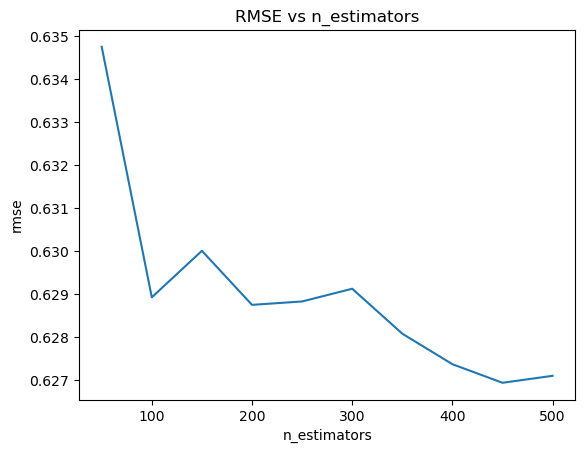

In [20]:
# Creating the 10 models
n_estimators = [50 + i*50 for i in range(10)]
models_n_estimators = [RandomForestRegressor(n_estimators = n_estimators[i], random_state = 42) for i in range(10)]

n_estimators_rmses = []
   
# Fitting the models and making predictions    
for model in models_n_estimators:                   
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    rmse = get_rmse(y_test, predictions)
    n_estimators_rmses += [rmse]
    print(f"RMSE of model with n_estimators={model.n_estimators}: {rmse:.5f}")
    
# Plotting the RMSEs
plt.plot(n_estimators, n_estimators_rmses)
plt.title("RMSE vs n_estimators")
plt.xlabel("n_estimators")
plt.ylabel("rmse")
plt.show()

### Experiment #2: 'max_depth'

RMSE of model with max_depth=10: 0.66732
RMSE of model with max_depth=20: 0.63326
RMSE of model with max_depth=30: 0.62885
RMSE of model with max_depth=40: 0.62892
RMSE of model with max_depth=50: 0.62892
RMSE of model with max_depth=60: 0.62892
RMSE of model with max_depth=70: 0.62892
RMSE of model with max_depth=80: 0.62892
RMSE of model with max_depth=90: 0.62892
RMSE of model with max_depth=100: 0.62892


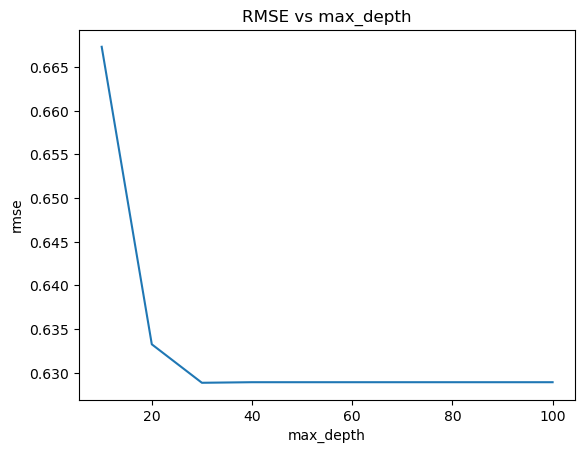

In [21]:
# Creating the 10 models
max_depths = [10 + i*10 for i in range(10)]
models_max_depths = [RandomForestRegressor(max_depth = max_depths[i], random_state = 42) for i in range(10)]

max_depths_rmses = []

# Fitting the models and making predictions
for model in models_max_depths:                   
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    rmse = get_rmse(y_test, predictions)
    max_depths_rmses += [rmse]
    print(f"RMSE of model with max_depth={model.max_depth}: {rmse:.5f}")
    
# Plotting the RMSEs
plt.plot(max_depths, max_depths_rmses)
plt.title("RMSE vs max_depth")
plt.xlabel("max_depth")
plt.ylabel("rmse")
plt.show()

### Experiment #3: 'min_samples_splits'
In this experiment, instead of creating 10 models, we will create 20 models for increased accuracy.

RMSE of model with min_samples_split=50: 0.67924
RMSE of model with min_samples_split=100: 0.69327
RMSE of model with min_samples_split=150: 0.70239
RMSE of model with min_samples_split=200: 0.70991
RMSE of model with min_samples_split=250: 0.71494
RMSE of model with min_samples_split=300: 0.71917
RMSE of model with min_samples_split=350: 0.72258
RMSE of model with min_samples_split=400: 0.72608
RMSE of model with min_samples_split=450: 0.72921
RMSE of model with min_samples_split=500: 0.73184
RMSE of model with min_samples_split=500: 0.73184
RMSE of model with min_samples_split=1000: 0.74752
RMSE of model with min_samples_split=1500: 0.76921
RMSE of model with min_samples_split=2000: 0.77565
RMSE of model with min_samples_split=2500: 0.79034
RMSE of model with min_samples_split=3000: 0.79075
RMSE of model with min_samples_split=3500: 0.89025
RMSE of model with min_samples_split=4000: 0.89025
RMSE of model with min_samples_split=4500: 0.89025
RMSE of model with min_samples_split=5000: 

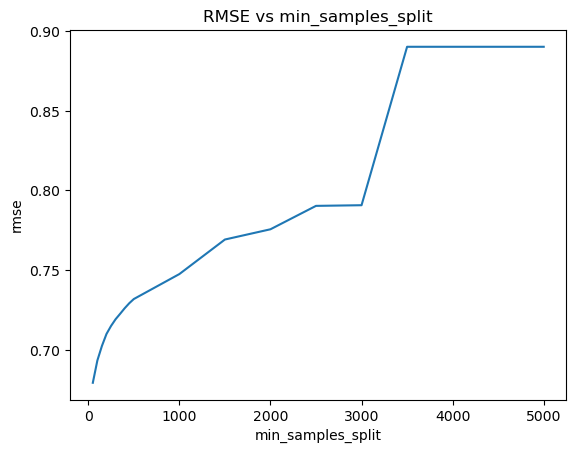

In [22]:
# Creating the 20 models
min_samples_splits = [50 + i*50 for i in range(10)] + [500 + i*500 for i in range(10)]
models_min_samples_splits = [RandomForestRegressor(min_samples_split = min_samples_splits[i], random_state = 42) for i in range(20)]

min_samples_splits_rmses = []

# Fitting the models and making predictions
for model in models_min_samples_splits:                   
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    rmse = get_rmse(y_test, predictions)
    min_samples_splits_rmses += [rmse]
    print(f"RMSE of model with min_samples_split={model.min_samples_split}: {rmse:.5f}")
    
# Plotting the RMSEs
plt.plot(min_samples_splits, min_samples_splits_rmses)
plt.title("RMSE vs min_samples_split")
plt.xlabel("min_samples_split")
plt.ylabel("rmse")
plt.show()

### Experiment 4: max_leaf_nodes

RMSE of model with max_leaf_nodes=200: 0.67125
RMSE of model with max_leaf_nodes=400: 0.65343
RMSE of model with max_leaf_nodes=600: 0.64202
RMSE of model with max_leaf_nodes=800: 0.63513
RMSE of model with max_leaf_nodes=1000: 0.63152
RMSE of model with max_leaf_nodes=1200: 0.63144
RMSE of model with max_leaf_nodes=1400: 0.63144
RMSE of model with max_leaf_nodes=1600: 0.63144
RMSE of model with max_leaf_nodes=1800: 0.63144
RMSE of model with max_leaf_nodes=2000: 0.63144


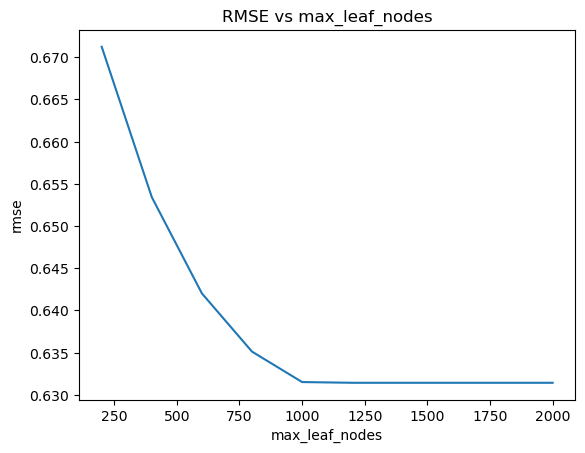

In [23]:
# Creating the 10 models
max_leaf_nodes = [200 + i*200 for i in range(10)]
models_max_leaf_nodes = [RandomForestRegressor(max_leaf_nodes = max_leaf_nodes[i], random_state = 42) for i in range(10)]

max_leaf_nodes_rmses = []

# Fitting the models and making predictions
for model in models_max_leaf_nodes:                   
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    rmse = get_rmse(y_test, predictions)
    max_leaf_nodes_rmses += [rmse]
    print(f"RMSE of model with max_leaf_nodes={model.max_leaf_nodes}: {rmse:.5f}")
    
# Plotting the RMSEs
plt.plot(max_leaf_nodes, max_leaf_nodes_rmses)
plt.title("RMSE vs max_leaf_nodes")
plt.xlabel("max_leaf_nodes")
plt.ylabel("rmse")
plt.show()

### Experiment 5: "min_samples_leaf"
In this experiment, instead of creating 10 models, we will create 20 models for increased accuracy.

RMSE of model with min_samples_leaf=25: 0.69082
RMSE of model with min_samples_leaf=50: 0.70305
RMSE of model with min_samples_leaf=75: 0.71190
RMSE of model with min_samples_leaf=100: 0.71852
RMSE of model with min_samples_leaf=125: 0.72417
RMSE of model with min_samples_leaf=150: 0.72867
RMSE of model with min_samples_leaf=175: 0.73164
RMSE of model with min_samples_leaf=200: 0.73587
RMSE of model with min_samples_leaf=225: 0.73866
RMSE of model with min_samples_leaf=250: 0.74032
RMSE of model with min_samples_leaf=250: 0.74032
RMSE of model with min_samples_leaf=500: 0.74924
RMSE of model with min_samples_leaf=750: 0.77298
RMSE of model with min_samples_leaf=1000: 0.78097
RMSE of model with min_samples_leaf=1250: 0.79671
RMSE of model with min_samples_leaf=1500: 0.80086
RMSE of model with min_samples_leaf=1750: 0.89025
RMSE of model with min_samples_leaf=2000: 0.89025
RMSE of model with min_samples_leaf=2250: 0.89025
RMSE of model with min_samples_leaf=2500: 0.89025


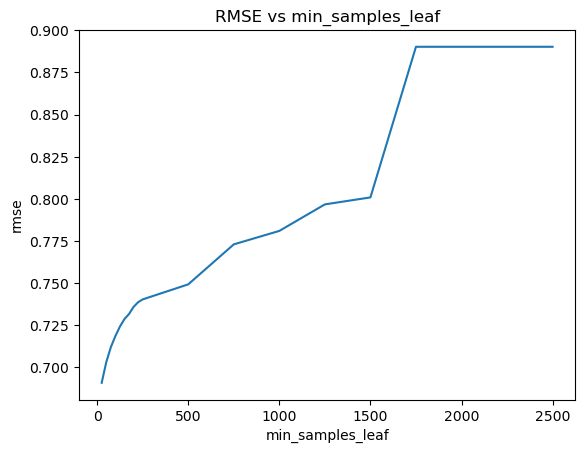

In [24]:
# Creating the 20 models
min_samples_leaves =  [25 + i*25 for i in range (10)] + [250 + i*250 for i in range(10)]
models_min_samples_leaves = [RandomForestRegressor(min_samples_leaf = min_samples_leaves[i], random_state = 42) for i in range(20)]

min_samples_leaves_rmses = []

# Fitting the models and making predictions
for model in models_min_samples_leaves:                   
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    rmse = get_rmse(y_test, predictions)
    min_samples_leaves_rmses += [rmse]
    print(f"RMSE of model with min_samples_leaf={model.min_samples_leaf}: {rmse:.5f}")

# Plotting the RMSEs
plt.plot(min_samples_leaves, min_samples_leaves_rmses)
plt.title("RMSE vs min_samples_leaf")
plt.xlabel("min_samples_leaf")
plt.ylabel("rmse")
plt.show()

### Experiment #6: "max_samples"

RMSE of model with max_samples=0.05: 0.70214
RMSE of model with max_samples=0.099: 0.68566
RMSE of model with max_samples=0.14800000000000002: 0.67922
RMSE of model with max_samples=0.197: 0.67264
RMSE of model with max_samples=0.246: 0.66514
RMSE of model with max_samples=0.295: 0.65620
RMSE of model with max_samples=0.34400000000000003: 0.65619
RMSE of model with max_samples=0.393: 0.65188
RMSE of model with max_samples=0.442: 0.64872
RMSE of model with max_samples=0.491: 0.64864
RMSE of model with max_samples=0.54: 0.64502
RMSE of model with max_samples=0.5890000000000001: 0.64271
RMSE of model with max_samples=0.6380000000000001: 0.64135
RMSE of model with max_samples=0.687: 0.64001
RMSE of model with max_samples=0.7360000000000001: 0.63786
RMSE of model with max_samples=0.785: 0.63680
RMSE of model with max_samples=0.8340000000000001: 0.63488
RMSE of model with max_samples=0.8830000000000001: 0.63327
RMSE of model with max_samples=0.932: 0.63241
RMSE of model with max_samples=0.98

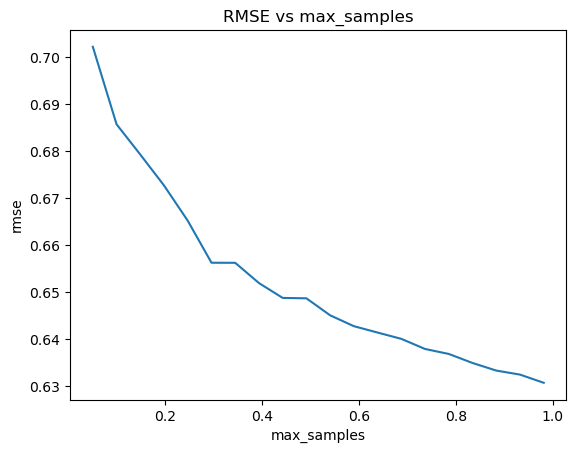

In [25]:
# Creating the 20 models
max_samples =  [0.05 + i*0.049 for i in range(20)]
models_max_samples = [RandomForestRegressor(max_samples = max_samples[i], random_state = 42) for i in range(20)]

max_samples_rmses = []

# Fitting the models and making predictions
for model in models_max_samples:                   
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    rmse = get_rmse(y_test, predictions)
    max_samples_rmses += [rmse]
    print(f"RMSE of model with max_samples={model.max_samples}: {rmse:.5f}")

# Plotting the RMSEs
plt.plot(max_samples, max_samples_rmses)
plt.title("RMSE vs max_samples")
plt.xlabel("max_samples")
plt.ylabel("rmse")
plt.show()

According to the above results, we will build now a final model with the parameters that gave us the best results. From the above graph's results, the best parameters are:

In [26]:
best_n_estimators = 450
best_max_depth = 20
best_min_samples_split = 2
best_max_leaf_nodes = 1000
best_min_samples_leaf = 2
best_max_samples = 1

print(f"Best n_estimators: {best_n_estimators}\nBest max_depth: {best_max_depth}\nBest min_samples_split: {best_min_samples_split}\nBest max_leaf_nodes: {best_max_leaf_nodes}\nBest min_samples_leaf: {best_min_samples_leaf}\nBest max_samples: {best_max_samples}")

Best n_estimators: 450
Best max_depth: 20
Best min_samples_split: 2
Best max_leaf_nodes: 1000
Best min_samples_leaf: 2
Best max_samples: 1


#### Developing & Training an optimized model using GridSearchCV

In [27]:
'''# Defining the optional values for each parameter
param_grid = {'n_estimators': [100, 300, 500],
              'max_depth': [20, 30, 40],
              'min_samples_split': [2, 500, 1000],
              'max_leaf_nodes': [333, 666, 1000],
              'min_samples_leaf': [1, 50, 100],
              'max_samples': [0.33,0.66,0.9810000000000001]}

# Using the GridSearchCV algorithm
best_model = model_selection.GridSearchCV(estimator = RandomForestRegressor(),
                                          param_grid = param_grid,
                                          scoring = 'neg_root_mean_squared_error',
                                          verbose=10,
                                          n_jobs=-1,
                                          cv=5)

best_model.fit(X_train, y_train)'''

"# Defining the optional values for each parameter\nparam_grid = {'n_estimators': [100, 300, 500],\n              'max_depth': [20, 30, 40],\n              'min_samples_split': [2, 500, 1000],\n              'max_leaf_nodes': [333, 666, 1000],\n              'min_samples_leaf': [1, 50, 100],\n              'max_samples': [0.33,0.66,0.9810000000000001]}\n\n# Using the GridSearchCV algorithm\nbest_model = model_selection.GridSearchCV(estimator = RandomForestRegressor(),\n                                          param_grid = param_grid,\n                                          scoring = 'neg_root_mean_squared_error',\n                                          verbose=10,\n                                          n_jobs=-1,\n                                          cv=5)\n\nbest_model.fit(X_train, y_train)"

## Creation of two final optimized models & comparison between them

For the comparison, we will run the RandomForest agorithm for the model we've choose to create, and for the model which we've created according to the GridSearch algorithm, and see the differences, if exist. **Our check will be according to the Optimal Criterion - RMSE**

In [28]:
#Running Random Forest Algorithm with the best 
#parameters, according to the RMSE's graphs we've
#created only
best_model = RandomForestRegressor(max_depth= 40,
 max_leaf_nodes= 1000,
 max_samples= 0.9810000000000001,
 min_samples_leaf= 1,
 min_samples_split= 2,
 n_estimators= 450,
 random_state= 42)

best_model.fit(X_train, y_train)
best_predictions = best_model.predict(X_test)
best_rmse = get_rmse(y_test, best_predictions)
print(f"RMSE of the optimized model according to our manual check: {best_rmse:.5f}")

# Running Random Forest Algorithm with the best 
# parameters,recommended by the GridSearch algorithm
best_model = RandomForestRegressor(bootstrap= True,
 ccp_alpha= 0.0,
 criterion='mse',
 max_depth=None,
 max_features='auto',
 max_leaf_nodes= None,
 max_samples= None,
 min_impurity_decrease= 0.0,
 #min_impurity_split= None,
 min_samples_leaf= 1,
 min_samples_split= 2,
 min_weight_fraction_leaf= 0.0,
 n_estimators= 100,
 n_jobs= None,
 oob_score= False,
 random_state= 42,
 verbose =0,
 warm_start =False)    

best_model.fit(X_train, y_train)
best_predictions = best_model.predict(X_test)
best_rmse = get_rmse(y_test, best_predictions)
print(f"RMSE of the optimized model according to GridSearchCV algorithm: {best_rmse:.5f}")

RMSE of the optimized model according to our manual check: 0.62740


/opt/conda/envs/Python-3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/opt/conda/envs/Python-3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


RMSE of the optimized model according to GridSearchCV algorithm: 0.62892


### Out Of Bag score
We will evaluate our model using oob_score's calculation, and see how good our model is.

In [29]:
accuracy = best_model.score(X_train, y_train)
print('Accuracy for Random Forest',100*accuracy) 

Accuracy for Random Forest 93.17744534893632


In [30]:
#import pickle
#pickle.dump(best_model,open('wine_quality.pkl','wb'))

In [31]:
!pip install -U ibm-watson-machine-learning

In [32]:
from ibm_watson_machine_learning import APIClient
import json
import numpy as np

In [33]:
wml_credentials = {
    "apikey":"KcTcdnvz8-ByK6gA-VyS2XqyxB_GfneRoX8SZOHl4Jpl",
    "url":"https://us-south.ml.cloud.ibm.com"
}

In [34]:
wml_client = APIClient(wml_credentials)
wml_client.spaces.list()

Note: 'limit' is not provided. Only first 50 records will be displayed if the number of records exceed 50
------------------------------------  ----  ------------------------
ID                                    NAME  CREATED
0277d3eb-6020-4040-895e-eaf464b5de9f  new   2023-02-10T18:13:23.730Z
------------------------------------  ----  ------------------------


In [35]:
def guid_from_space_name(client, space_name):
    space = client.spaces.get_details()
    #print(space)
    return(next(item for item in space['resources'] if item['entity']["name"] == space_name)['metadata']['id'])

In [36]:
space_uid = guid_from_space_name(wml_client, space_name='new')
print("Space UID = " + space_uid)

Space UID = 0277d3eb-6020-4040-895e-eaf464b5de9f


In [38]:
wml_client.set.default_space(space_uid)

'SUCCESS'

In [39]:
wml_client.software_specifications.list()

-----------------------------  ------------------------------------  ----
NAME                           ASSET_ID                              TYPE
default_py3.6                  0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12      020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt     069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6        09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12     09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9      0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6          0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                     0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod   1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6              10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl      111e41b3-de2d-5422-a4d6-bf776828c4b7  base
autoai-kb_rt22.2-py3.10        125b6d9

In [40]:
import sklearn
sklearn.__version__

'1.1.1'

In [41]:
software_spec_uid= wml_client.software_specifications.get_uid_by_name("runtime-22.1-py3.9")
software_spec_uid

'12b83a17-24d8-5082-900f-0ab31fbfd3cb'

In [42]:
model_details = wml_client.repository.store_model(model=best_model,
                                              meta_props={wml_client.repository.ModelMetaNames.NAME:"churnmodeling",
                                                          wml_client.repository.ModelMetaNames.TYPE:"scikit-learn_1.0",
                                                          wml_client.repository.ModelMetaNames.SOFTWARE_SPEC_UID:software_spec_uid
                                                         },
                                              training_data=X_train,
                                              training_target=y_train)

In [43]:
model_id = wml_client.repository.get_model_id(model_details)
model_id

'7233f79e-84fa-492c-8fa2-b0431561377a'

In [44]:
MODEL_NAME = 'wineModel'
DEPLOYMENT_NAME = 'wineModel'
WINE_MODEL = best_model

In [47]:
# Deploy
deployment = wml_client.deployments.create(
    artifact_uid=model_id, 
    meta_props={wml_client.deployments.ConfigurationMetaNames.NAME:"Wine Quality Prediction", 
    wml_client.deployments.ConfigurationMetaNames.ONLINE: {}
})



#######################################################################################

Synchronous deployment creation for uid: '7233f79e-84fa-492c-8fa2-b0431561377a' started

#######################################################################################


initializing
Note: online_url is deprecated and will be removed in a future release. Use serving_urls instead.

ready


------------------------------------------------------------------------------------------------
Successfully finished deployment creation, deployment_uid='ebcbc9fb-97c6-475b-b6bb-f0b48713c542'
------------------------------------------------------------------------------------------------


